In [1]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from nltk.stem.snowball import SpanishStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
stopwords_es = stopwords.words("spanish")
my_stopwords = ["MENTION", "HASHTAG", "URL", "-", "mujer", "femin", "strp"]
letts_digs_punts = list(string.ascii_lowercase) + list(string.ascii_uppercase) + list(string.digits) + list(string.punctuation)
stopwords = stopwords_es + my_stopwords + letts_digs_punts

In [3]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,index,tweet,humor,prejudice_woman,prejudice_lgbtiq,prejudice_inmigrant_race,gordofobia,mean_prejudice
0,0,32261,MENTION La primera vez podría tomarse como que...,0,1,0,0,0,1.8
1,1,67362,¿Por qué Ricky Martin tardó tanto en salir del...,1,0,1,0,0,2.4
2,2,9818,"Van a cambiar las señales, porque un niño cogi...",0,1,0,0,0,2.0
3,3,4920,En que se parece una sirena y un transexual? E...,1,0,1,0,0,3.8
4,4,13205,La pelotuda esta MENTION comenzó todo ahora c...,0,1,0,0,0,2.4


In [4]:
all_humor = data["tweet"]
no_humor = data[data.humor == 0]["tweet"]
yes_humor = data[data.humor == 1]["tweet"]

In [5]:
lemmatizer = WordNetLemmatizer()
stemmer = SpanishStemmer()

In [6]:
all_humor_string = all_humor.to_string().lower()
tokens_all_humor = nltk.word_tokenize(all_humor_string)
tokens_all_humor_stems_lems = []
for i in tokens_all_humor:
    # stems = stemmer.stem(i)
    lemms = lemmatizer.lemmatize(i)
    tokens_all_humor_stems_lems.append(lemms)
string_all_humor = " ".join(tokens_all_humor_stems_lems)

In [7]:
no_humor_string = no_humor.to_string().lower()
tokens_no_humor = nltk.word_tokenize(no_humor_string)
tokens_no_humor_stems_lems = []
for i in tokens_no_humor:
    # stems = stemmer.stem(i)
    lemms = lemmatizer.lemmatize(i)
    tokens_no_humor_stems_lems.append(lemms)
string_no_humor = " ".join(tokens_no_humor_stems_lems)

In [8]:
yes_humor_string = yes_humor.to_string().lower()
tokens_yes_humor = nltk.word_tokenize(yes_humor_string)
tokens_yes_humor_stems_lems = []
for i in tokens_yes_humor:
    # stems = stemmer.stem(i)
    lemms = lemmatizer.lemmatize(i)
    tokens_yes_humor_stems_lems.append(lemms)
string_yes_humor = " ".join(tokens_yes_humor_stems_lems)

In [9]:
def word_cloud(name, data):
    cloud_mask = np.array(Image.open("cloud.jpg"))
    wordcloud = WordCloud(width = 1080,
                          height = 1080,
                          stopwords = stopwords,
                          colormap = "tab10_r", #https://matplotlib.org/stable/tutorials/colors/colormaps.html
                          background_color = "white",
                          mask = cloud_mask,
                          normalize_plurals = False,
                          margin = 0,
                          min_word_length = 4,
                          random_state = 42).generate(data)
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.margins(x = 0, y = 0)
    wordcloud.to_file(name + ".png")
    wordcloud.to_file(name + ".pdf")
    plt.show()

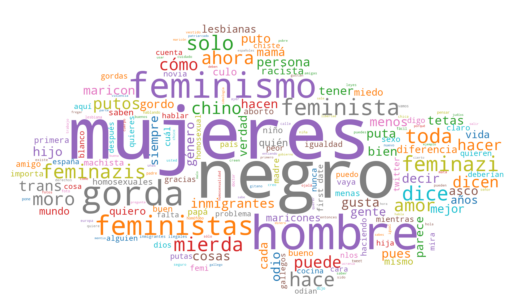

In [10]:
word_cloud("ALL", string_all_humor)

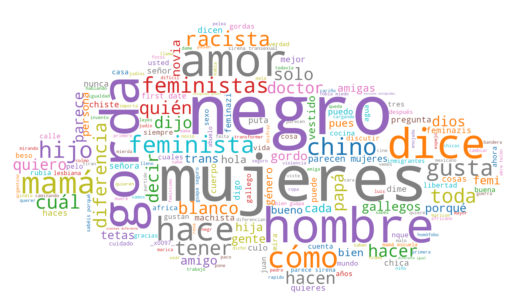

In [11]:
word_cloud("YES", string_yes_humor)

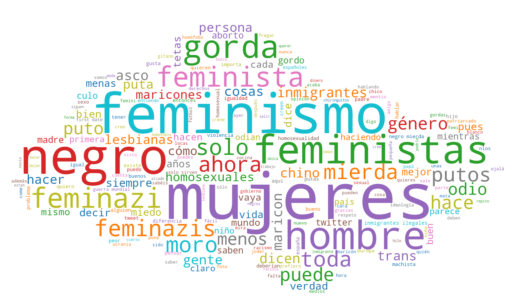

In [12]:
word_cloud("NO", string_no_humor)